# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
# Read the data
data = pd.read_csv('stock_data.csv')

In [4]:
# Check the shape
data.shape

(340, 15)

In [5]:
# View sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [6]:
# Check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [3]:
# Create a copy
df = data.copy()

In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
# Check for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [12]:
# Check statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

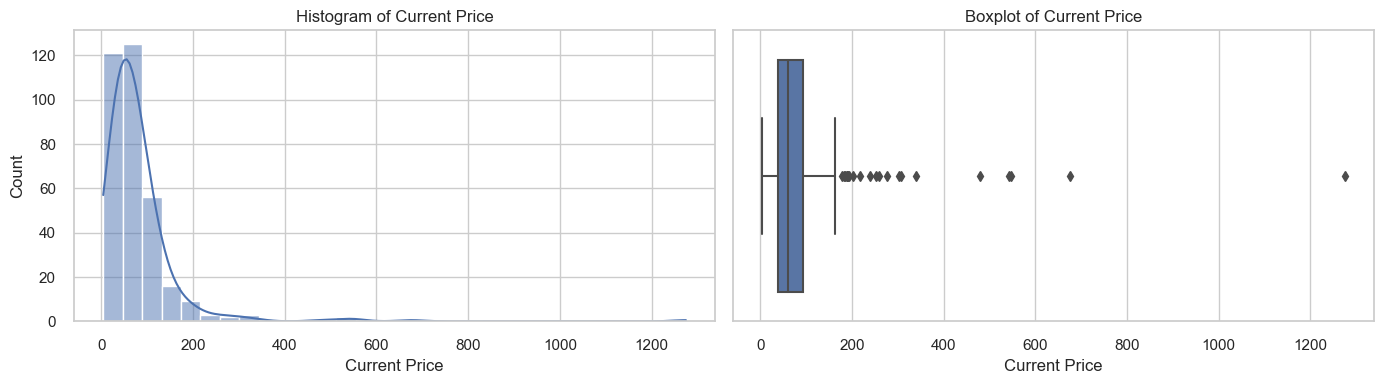

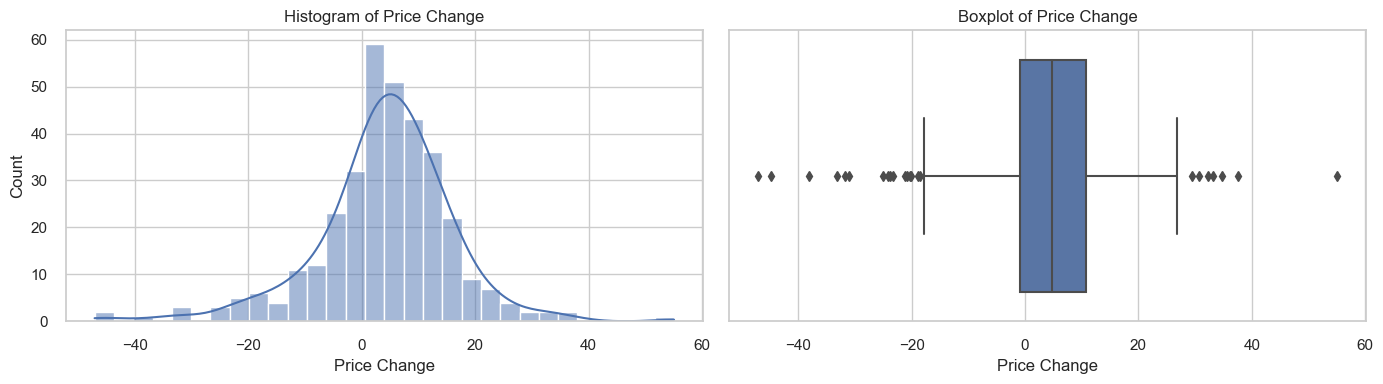

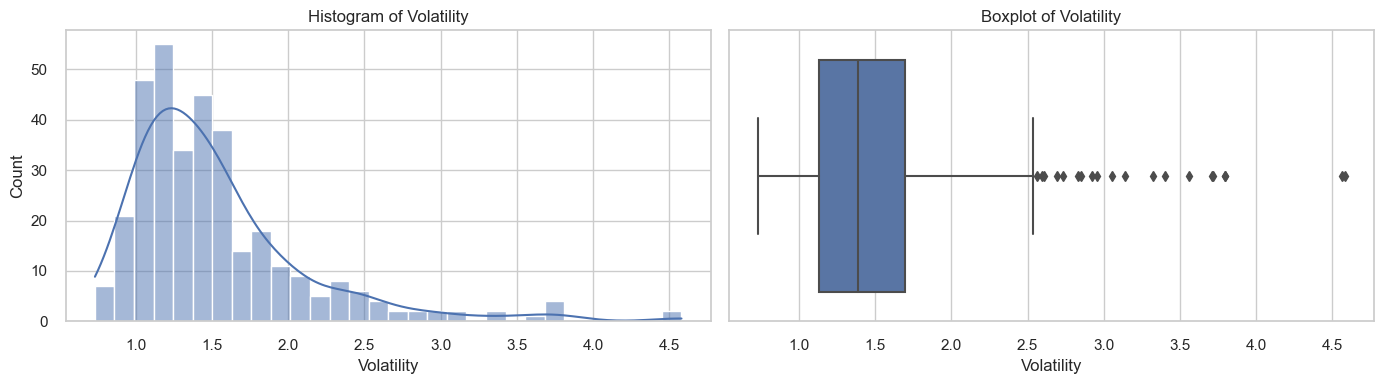

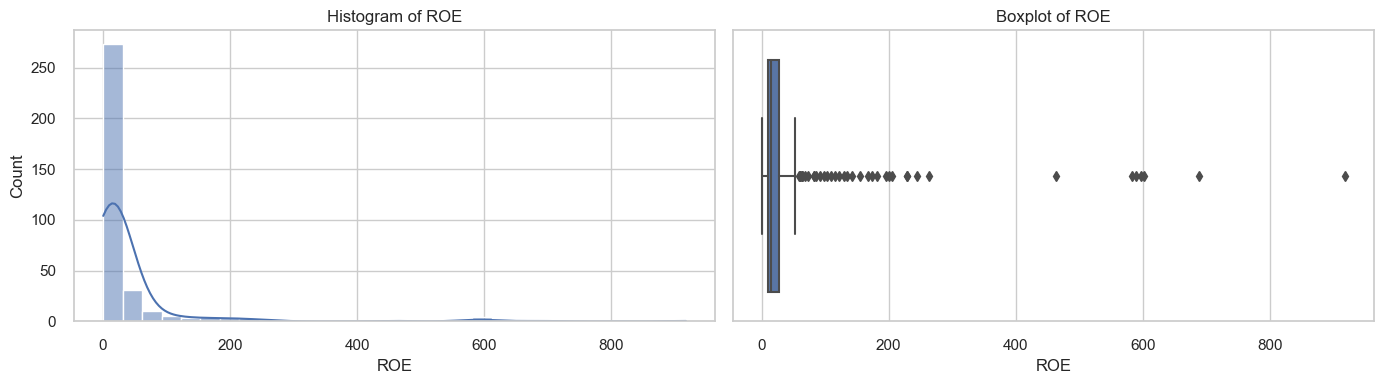

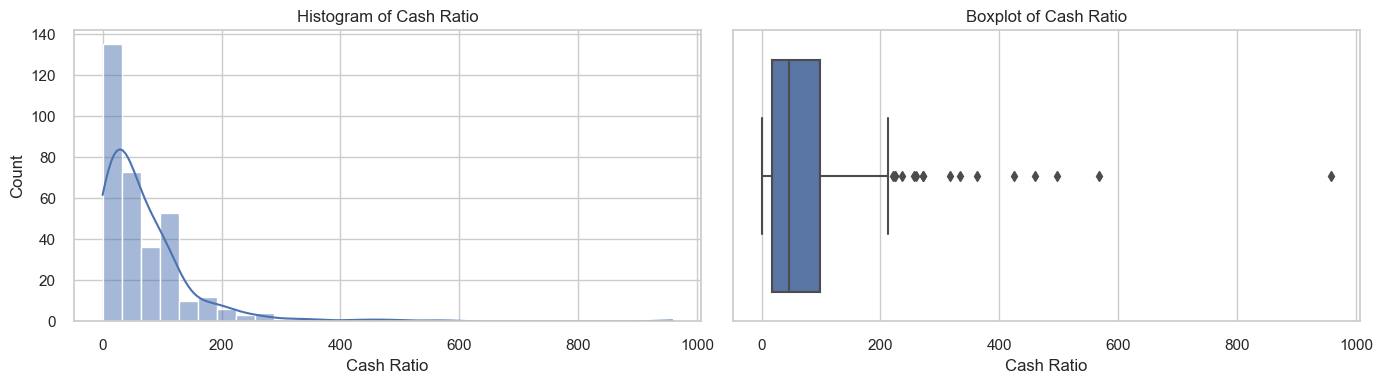

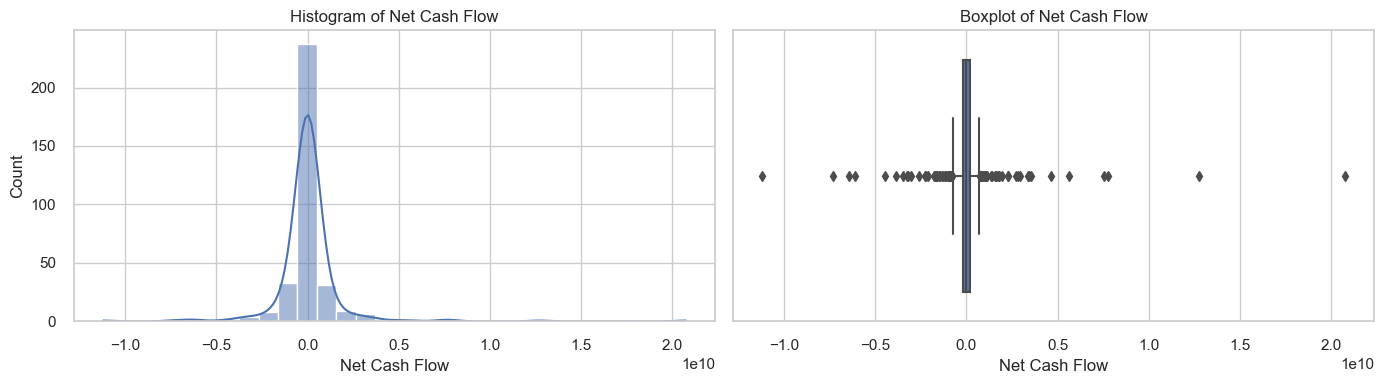

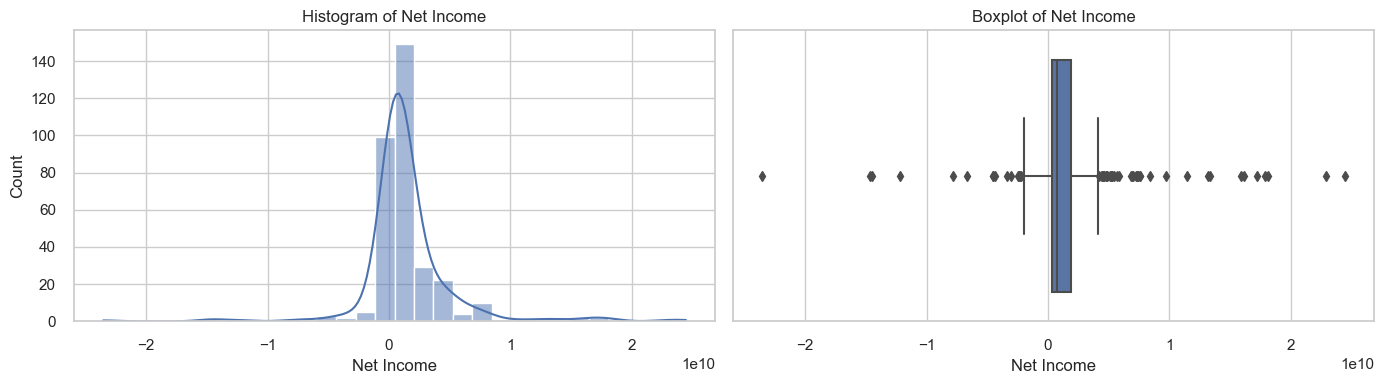

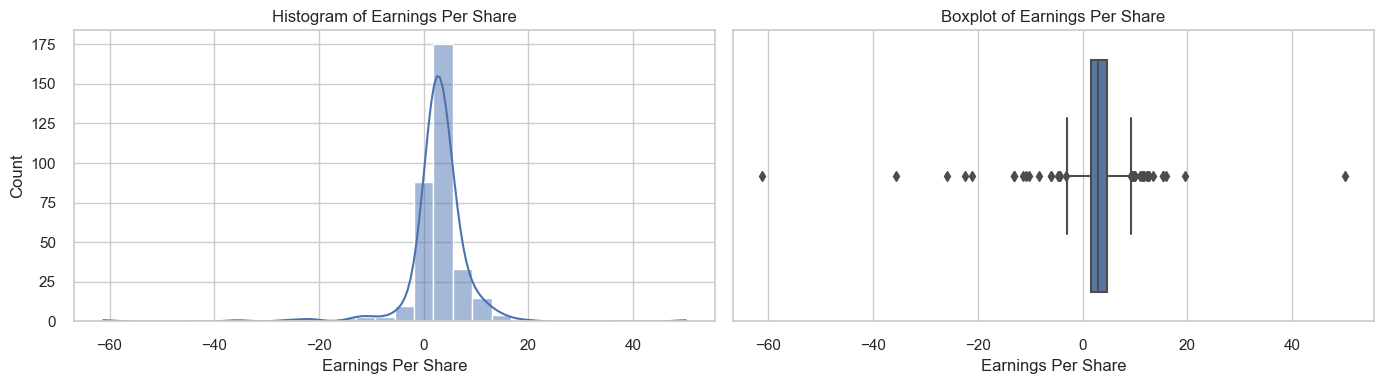

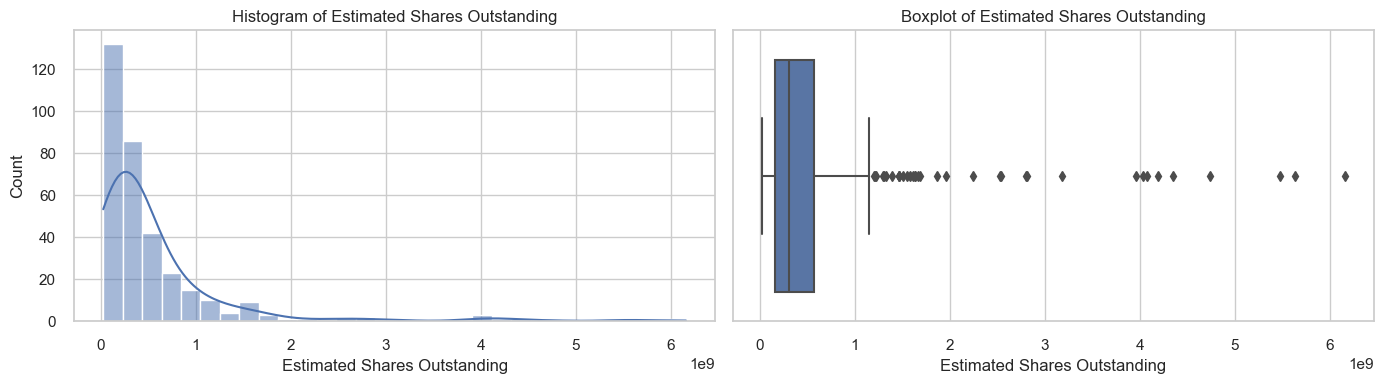

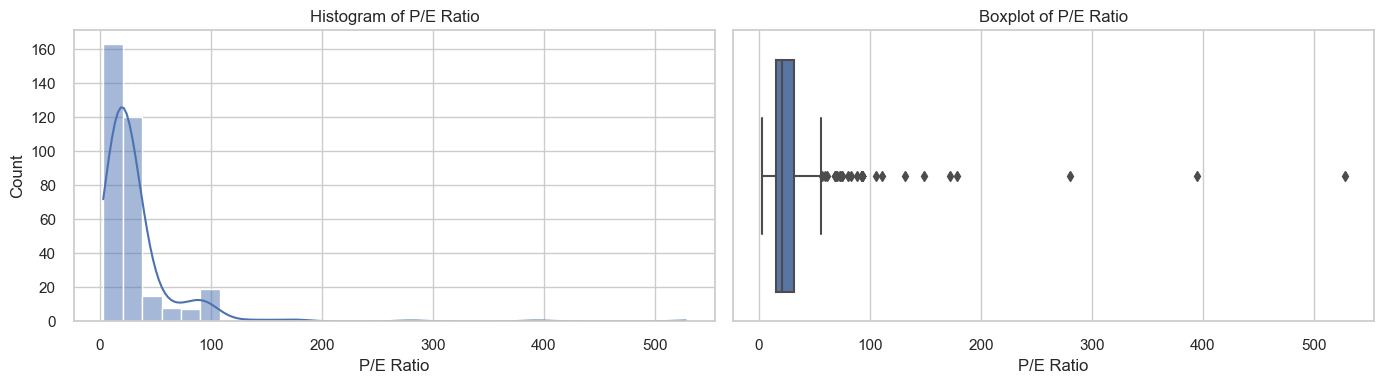

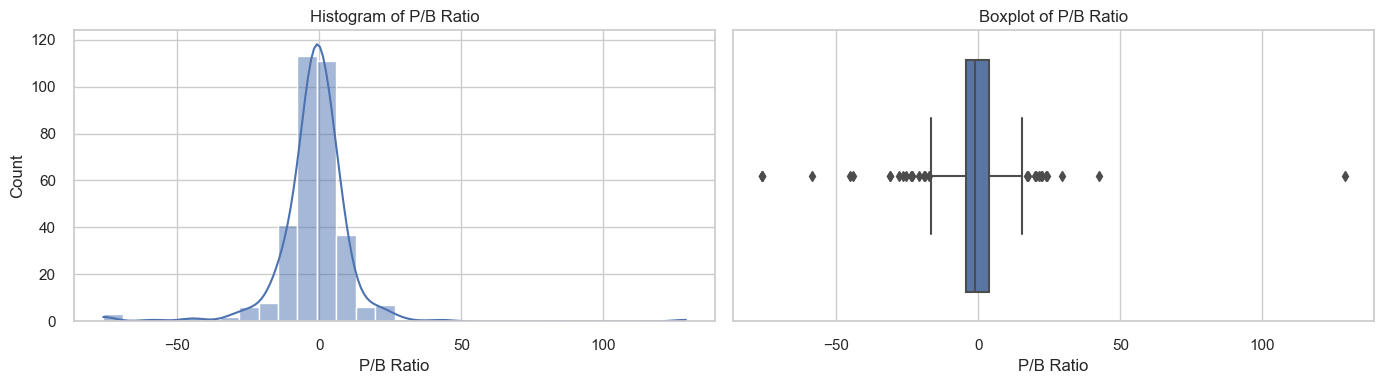

In [14]:
# Separate categorical and numerical columns for possible different analysis
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Create a histogram and boxplot for each numerical column
for column in numerical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    # Histogram
    sns.histplot(data[column], bins=30, ax=ax[0], kde=True)
    ax[0].set_title(f'Histogram of {column}')
    
    # Boxplot
    sns.boxplot(x=data[column], ax=ax[1])
    ax[1].set_title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

Current Price: The distribution is heavily right-skewed, indicating that most stocks are clustered at the lower price range, with a few stocks having very high prices. There are noticeable outliers on the higher end, which could represent stocks with exceptionally high prices.

Price Change: This variable also shows a right-skewed distribution. Most stocks had a small price change, but there are some with significant positive changes and a few with large negative changes.
Outliers are present on both ends, indicating some stocks had unusually large price increases or decreases.

Volatility: The histogram for volatility appears to have a slightly right-skewed distribution, with most stocks having lower volatility. The boxplot shows a few outliers, suggesting that some stocks are much more volatile than others.

ROE (Return on Equity): The distribution of ROE is extremely right-skewed with several outliers, indicating that a few stocks have exceptionally high returns on equity. The presence of high outliers suggests that there might be a small number of highly profitable companies or those with smaller equity bases, which increases ROE.

Cash Ratio: The cash ratio is right-skewed, with many companies having a lower ratio and a few having very high cash ratios.
Outliers suggest some companies are holding much more cash in comparison to their current liabilities than typical.

Net Cash Flow: The distribution of net cash flow has outliers on both the high and low ends, indicating that some companies are experiencing large cash inflows or outflows. The boxplot shows that the median is close to zero but the mean is higher due to the presence of these outliers.

Net Income: Net income is right-skewed, with outliers indicating that a few companies have very high net incomes.
The variability in net income is quite large among different companies, as shown by the spread in the boxplot.

arnings Per Share (EPS): The EPS variable is right-skewed, with a few stocks showing very high earnings per share.
There are outliers, particularly on the higher end, which may be due to exceptionally high earnings or low numbers of shares outstanding.

Estimated Shares Outstanding: The distribution of shares outstanding is right-skewed, suggesting most companies have a smaller number of shares, with a few companies having a large number. Outliers in the boxplot indicate some companies have an exceptionally high number of shares outstanding.

P/E Ratio (Price to Earnings): The P/E ratio is right-skewed, with a mean significantly higher than the median, indicating the presence of high-value outliers. This suggests that while most stocks have a moderate P/E ratio, some are valued much higher in terms of their current share price relative to their earnings.

P/B Ratio (Price to Book): The P/B ratio distribution is unusual with a mean that is negative. This could be due to a few stocks with extremely negative book values or possibly data errors. There are extreme outliers on both ends, which significantly affect the mean and indicate that there are stocks with highly unusual price to book ratios.

### Bivariate Analysis

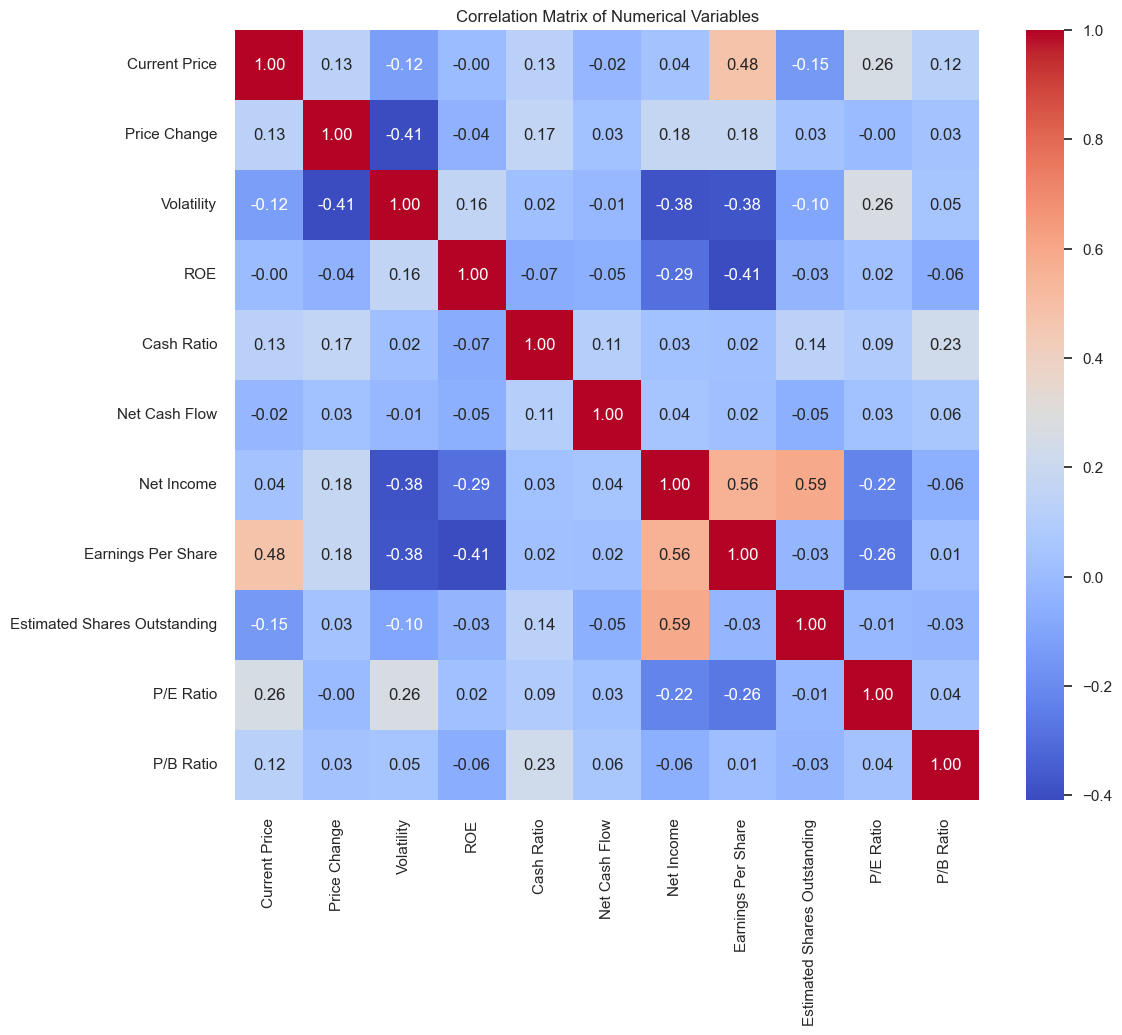

In [15]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

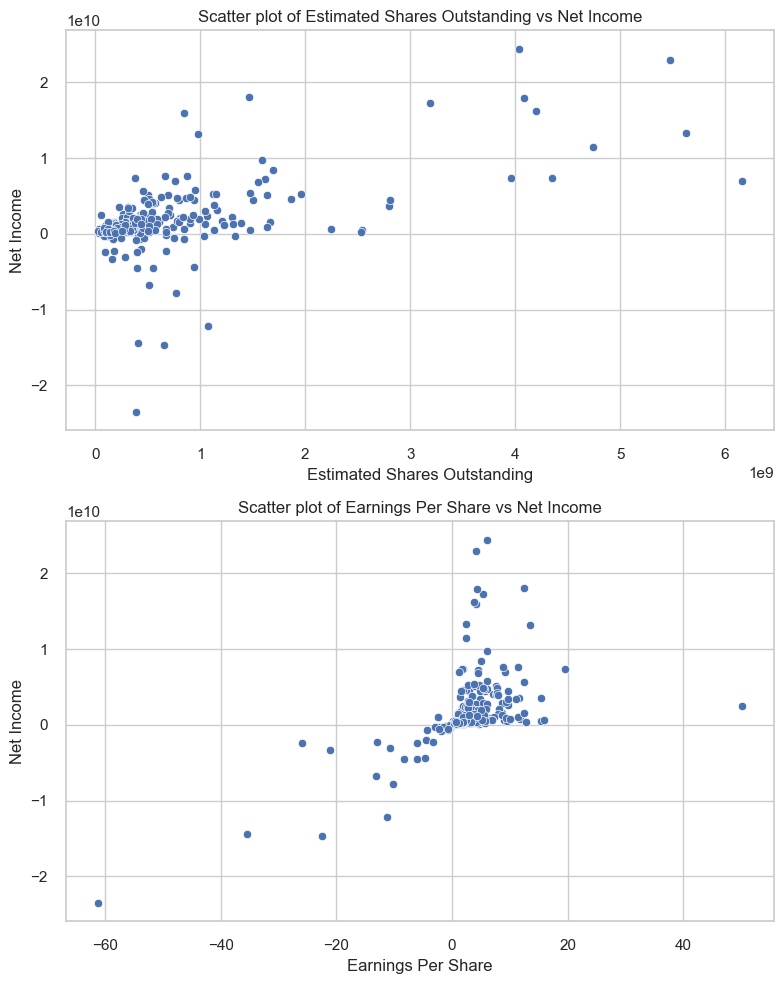

In [16]:
# Select a subset of variables with the highest absolute correlations for the scatter plot matrix
# Exclude correlations of a variable with itself (which are 1) and focus on the ones with absolute value higher than 0.5

# Unstack and sort the correlation matrix to identify highest correlations
sorted_correlations = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations < 1].drop_duplicates()

# Set a threshold for high correlation
high_correlation_threshold = 0.5
high_correlations = sorted_correlations[sorted_correlations > high_correlation_threshold]

# Get the pairs of variables that have a high correlation
high_correlation_pairs = high_correlations.index.tolist()

# Create scatter plots only for those pairs
n_plots = len(high_correlation_pairs)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, n_plots * 5))

# If there is only one plot, axes will not be an array, so check and adjust
if n_plots == 1:
    axes = [axes]

for i, (var1, var2) in enumerate(high_correlation_pairs):
    sns.scatterplot(data=data, x=var1, y=var2, ax=axes[i])
    axes[i].set_title(f'Scatter plot of {var1} vs {var2}')

plt.tight_layout()
plt.show()

ROE vs. Earnings Per Share (EPS): There is a positive correlation between ROE and EPS, indicating that companies with higher returns on equity tend to have higher earnings per share. The relationship seems to be linear, with some scattering which suggests other factors may also influence EPS.

Net Income vs. Earnings Per Share (EPS): A strong positive correlation is also observed here, suggesting that companies with higher net income typically report higher earnings per share. The relationship appears to be fairly linear, though the spread increases with higher values of net income, indicating variability in EPS even among companies with similar net income levels.

Net Cash Flow vs. Net Income: These variables also show a positive correlation, indicating that companies with higher net income often have higher net cash flow. However, the scatter plot shows a wide dispersion of points, which could be due to differences in cash flow management, non-operational income, or accounting practices.

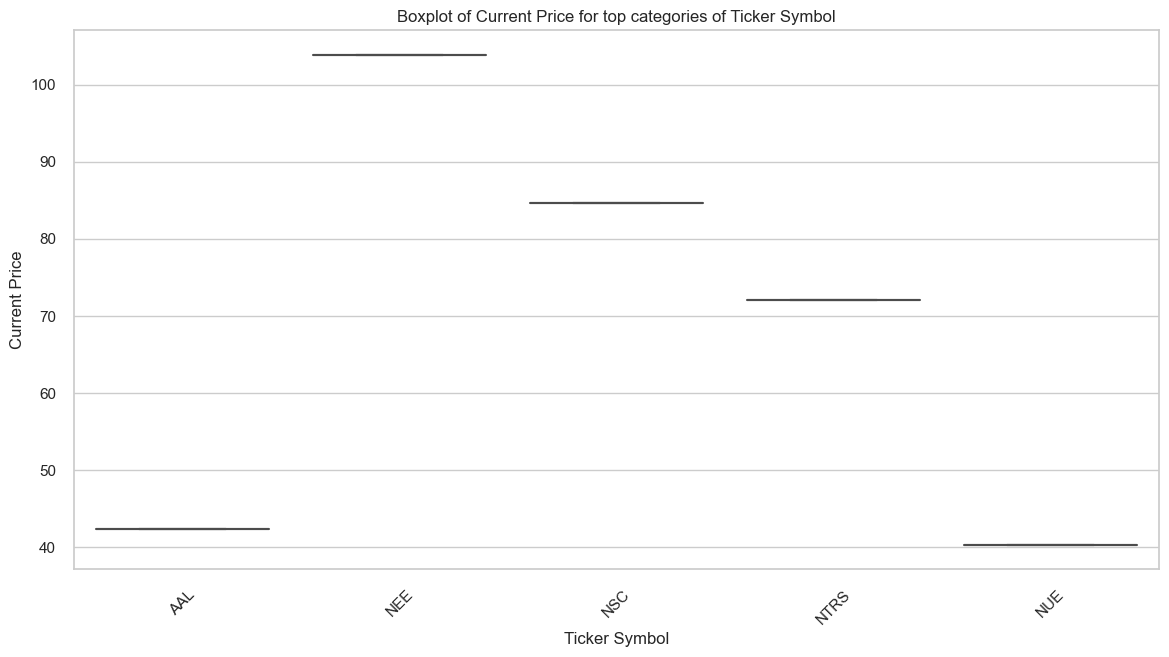

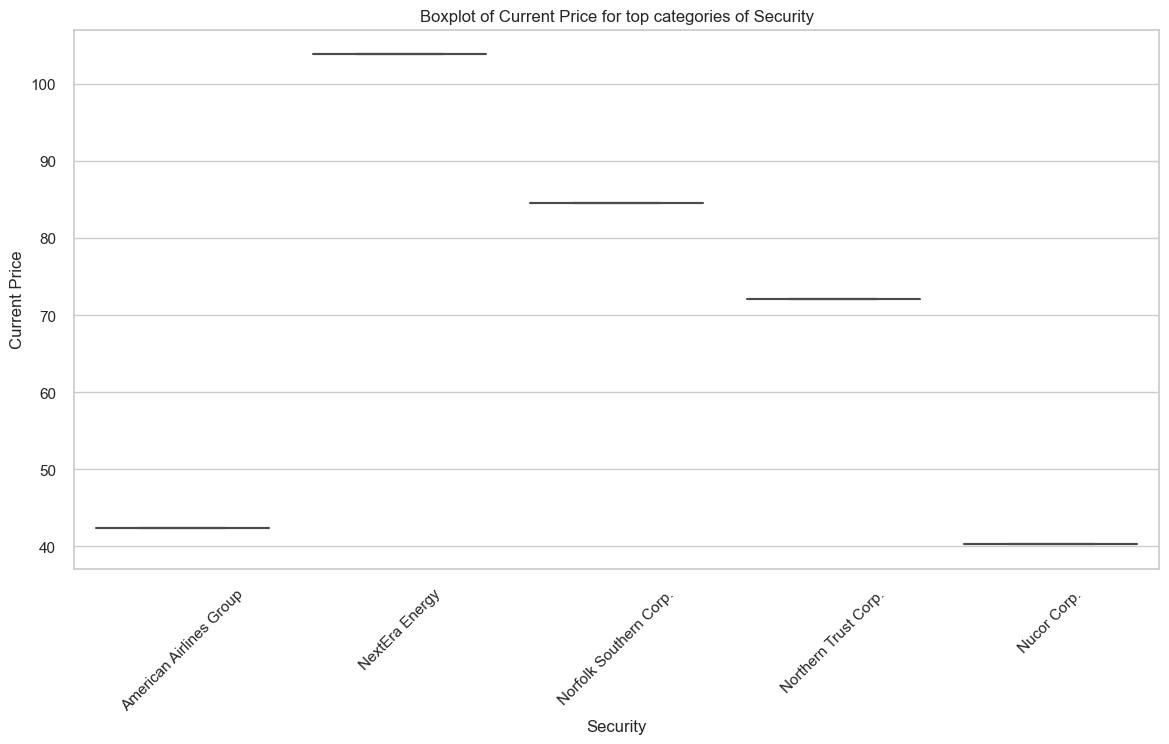

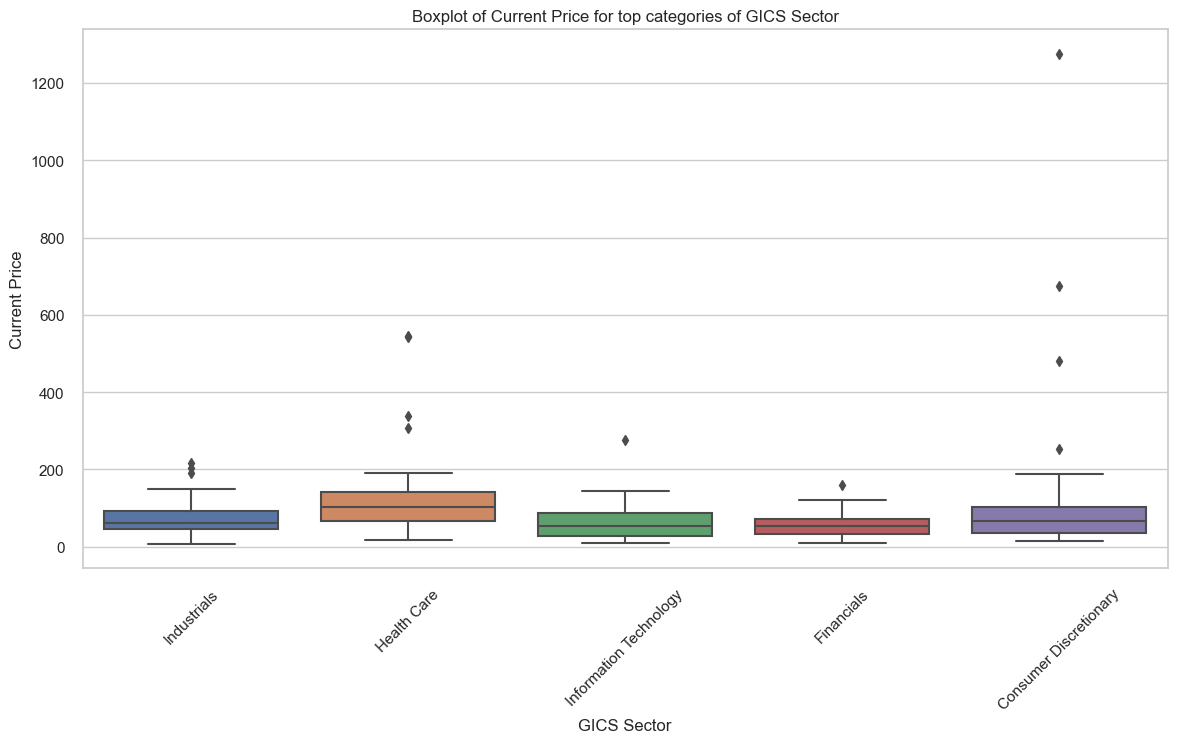

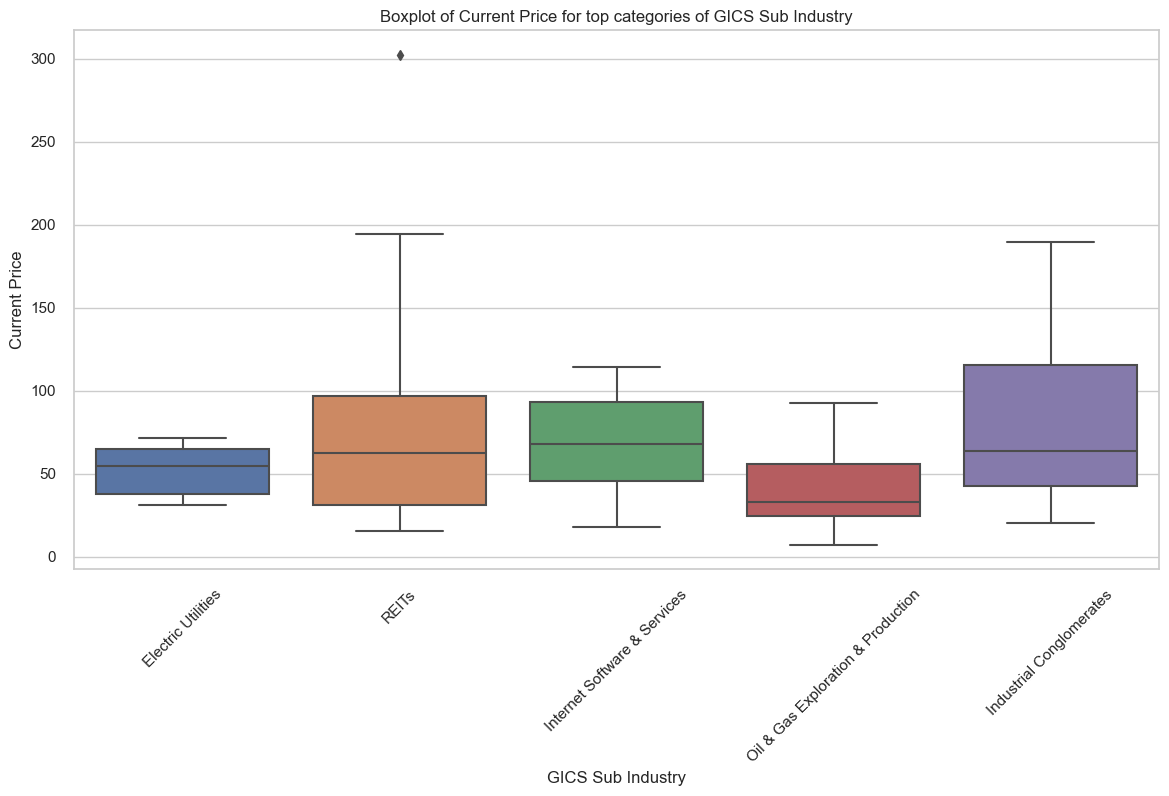

In [18]:
# Choose the top 5 most frequent categories for each categorical variable to avoid clutter in the plots.
numerical_variable = 'Current Price'
top_categories_number = 5

# Generate boxplots for the numerical variable across the top categories of each categorical variable
for categorical_variable in categorical_columns:
    # Get the top categories
    top_categories = data[categorical_variable].value_counts().nlargest(top_categories_number).index
    
    # Filter the data for these top categories only
    top_filtered_data = data[data[categorical_variable].isin(top_categories)]
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(x=categorical_variable, y=numerical_variable, data=top_filtered_data)
    plt.title(f'Boxplot of {numerical_variable} for top categories of {categorical_variable}')
    plt.xticks(rotation=45)  # Rotate category labels to avoid overlap
    plt.show()

Ticker Symbol: The boxplot shows the price distribution for the top ticker symbols. Significant variation in median values indicates differences in stock prices among these symbols.

Security: Similar to ticker symbols, the security names corresponding to the most frequently occurring securities show a range of median prices, suggesting that certain securities have higher or lower stock prices.

GICS Sector: The distribution of stock prices varies across different sectors. Some sectors have a higher median price, and the spread within sectors (as shown by the interquartile range) also varies, indicating the diversity in stock prices within each sector.

GICS Sub Industry: The sub-industry category shows a range of price distributions for the top sub-industries. Like the sectors, there is noticeable variability both between and within sub-industries.

From these boxplots, we can see that the distribution of stock prices can vary quite significantly based on the category. Some categories have a wide range of prices, while others are more uniform. The presence of outliers in several categories suggests that there are stocks with prices that are significantly different from the median of the group.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [19]:
# Check for outliers
# Outlier detection using the IQR method

# Dictionary to store outliers for each numerical column
outliers_dict = {}

for column in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the cutoff for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Store outliers in dictionary
    outliers_dict[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }

# Summarize the findings
outliers_summary = {column: len(outliers_info['outliers']) for column, outliers_info in outliers_dict.items()}
outliers_summary

{'Current Price': 22,
 'Price Change': 23,
 'Volatility': 20,
 'ROE': 39,
 'Cash Ratio': 16,
 'Net Cash Flow': 76,
 'Net Income': 57,
 'Earnings Per Share': 39,
 'Estimated Shares Outstanding': 35,
 'P/E Ratio': 41,
 'P/B Ratio': 30}

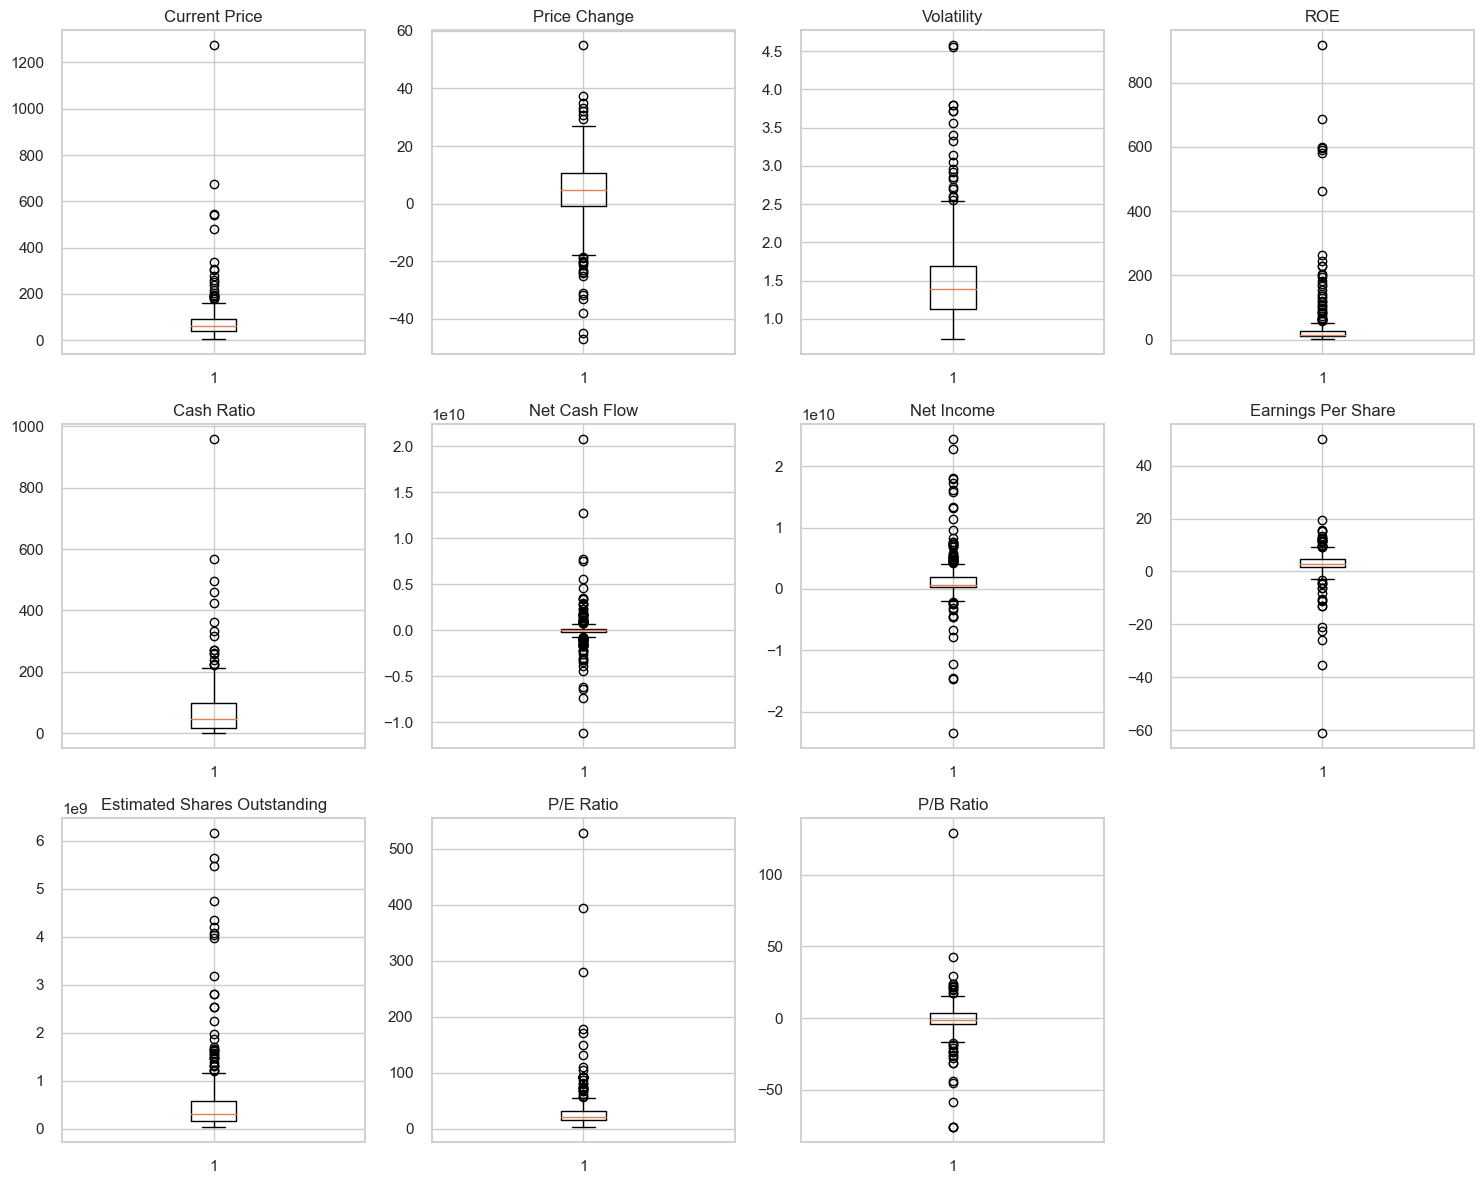

In [20]:
# Visualize the outliers with boxplots
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [5]:
# Scale the data before clustering
scaler = StandardScaler()

# Select the numerical columns (excluding any categorical or identifier columns)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
subset = data[numerical_columns]

# Apply the scaler to the numerical subset of the data
subset_scaled = scaler.fit_transform(subset)

In [6]:
# Create a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

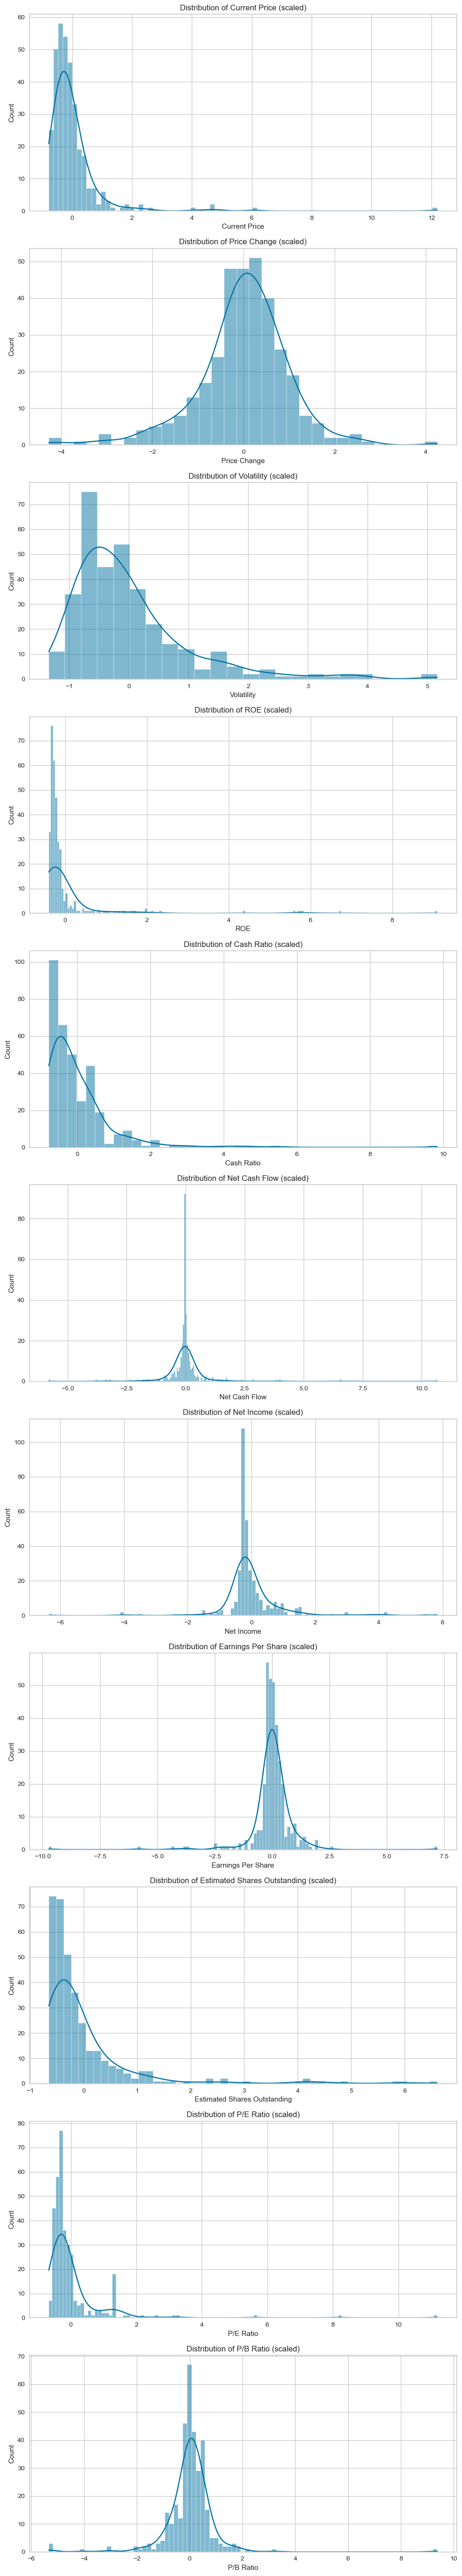

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,7.836868e-18,-2.873518e-17,-7.967483e-17,2.873518e-17,-8.098097e-17,2.612289e-18,1.044916e-17,5.747037e-17,-1.044916e-16,7.836868e-18,2.612289e-17
std,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00
min,-7.799176e-01,-4.271357e+00,-1.341642e+00,-4.003618e-01,-7.755552e-01,-5.795489e+00,-6.359977e+00,-9.725729e+00,-6.504299e-01,-6.701624e-01,-5.334786e+00
25%,-4.321010e-01,-4.185350e-01,-6.618376e-01,-3.095993e-01,-5.761937e-01,-1.283478e-01,-2.902850e-01,-1.853369e-01,-4.951193e-01,-3.967149e-01,-1.888527e-01
50%,-2.160880e-01,6.183430e-02,-2.375644e-01,-2.551418e-01,-2.550003e-01,-2.749658e-02,-2.000453e-01,1.798977e-02,-3.165424e-01,-2.663000e-01,4.668452e-02
75%,1.227409e-01,5.519628e-01,2.869602e-01,-1.306675e-01,3.209329e-01,5.879757e-02,1.028417e-01,2.802242e-01,-4.630427e-03,-1.914502e-02,4.040708e-01
max,1.219567e+01,4.251806e+00,5.168258e+00,9.101176e+00,9.834905e+00,1.065524e+01,5.832629e+00,7.192572e+00,6.609320e+00,1.118762e+01,9.377562e+00


In [7]:
# Summary statistics
summary_statistics_scaled = subset_scaled_df.describe()

# Distribution plots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    sns.histplot(subset_scaled_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} (scaled)')

plt.tight_layout()
plt.show()

summary_statistics_scaled

Summary Statistics: The mean of each feature is very close to 0, and the standard deviation is 1. This confirms that the StandardScaler has worked as expected, standardizing each feature to have a mean of 0 and a standard deviation of 1.

Distributions: The shapes of the distributions have not changed after scaling. This means that the relative spacing between data points within each feature is preserved. The histograms reveal that most variables are still right-skewed, similar to their original distribution. This is expected since scaling does not alter the shape of the distribution.

## K-means Clustering

### Elbow Plot

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.136852169310594
Number of Clusters: 6 	Average Distortion: 2.0713095032364506
Number of Clusters: 7 	Average Distortion: 1.9775989987671811
Number of Clusters: 8 	Average Distortion: 1.9652603012304684
Number of Clusters: 9 	Average Distortion: 1.9311613101229932
Number of Clusters: 10 	Average Distortion: 1.8502089919483546
Number of Clusters: 11 	Average Distortion: 1.824801480357901
Number of Clusters: 12 	Average Distortion: 1.7525839358924042
Number of Clusters: 13 	Average Distortion: 1.722563828836958
Number of Clusters: 14 	Average Distortion: 1.6973594266503265


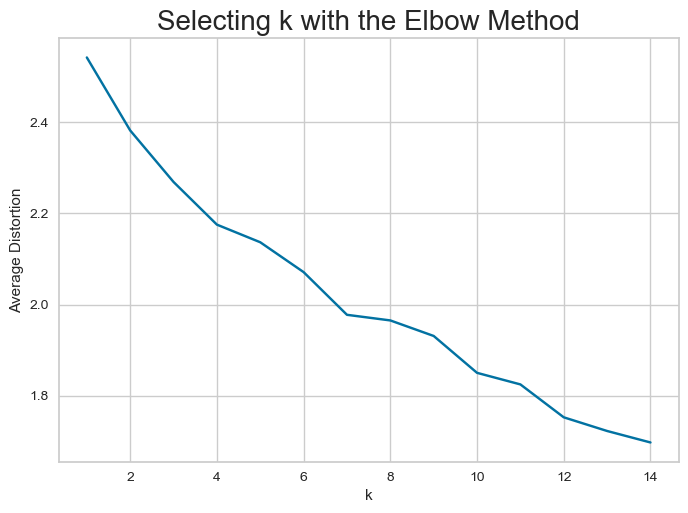

In [8]:
# Check elbow plot
k_means_df = subset_scaled_df.copy()
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

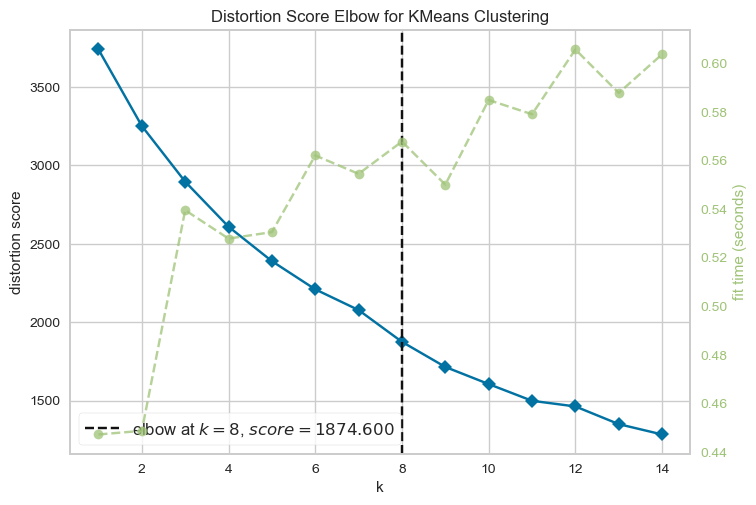

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df) 
visualizer.show() 

### Silhouette Scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.45434371948348606)
For n_clusters = 5, the silhouette score is 0.43169988466492354)
For n_clusters = 6, the silhouette score is 0.36698524210914063)
For n_clusters = 7, the silhouette score is 0.10587349598463779)
For n_clusters = 8, the silhouette score is 0.40021596082234684)
For n_clusters = 9, the silhouette score is 0.4051539505522536)
For n_clusters = 10, the silhouette score is 0.1147132918355368)
For n_clusters = 11, the silhouette score is 0.16268826704862685)
For n_clusters = 12, the silhouette score is 0.12883008320005324)
For n_clusters = 13, the silhouette score is 0.1744804713048242)
For n_clusters = 14, the silhouette score is 0.17597674098501367)


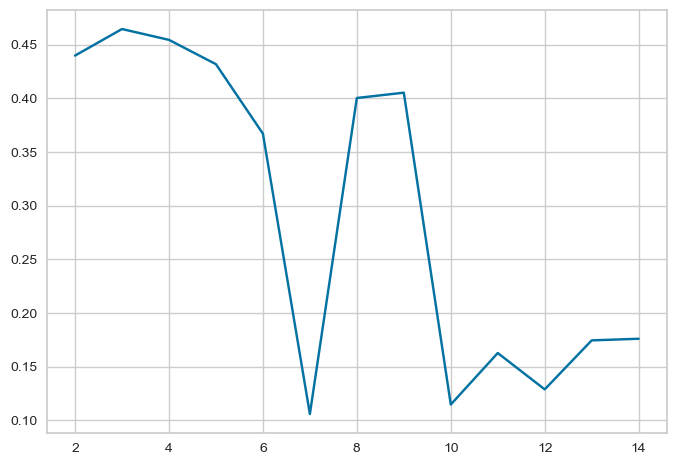

In [10]:
# Check the silhouette scores
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

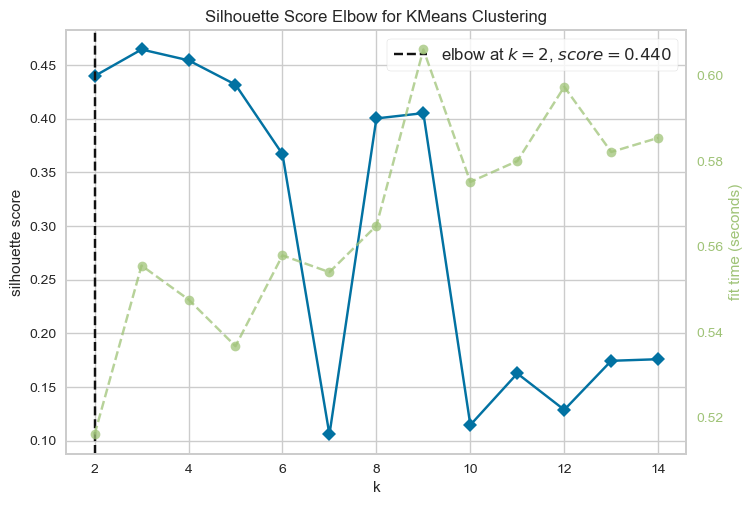

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  
visualizer.show()  

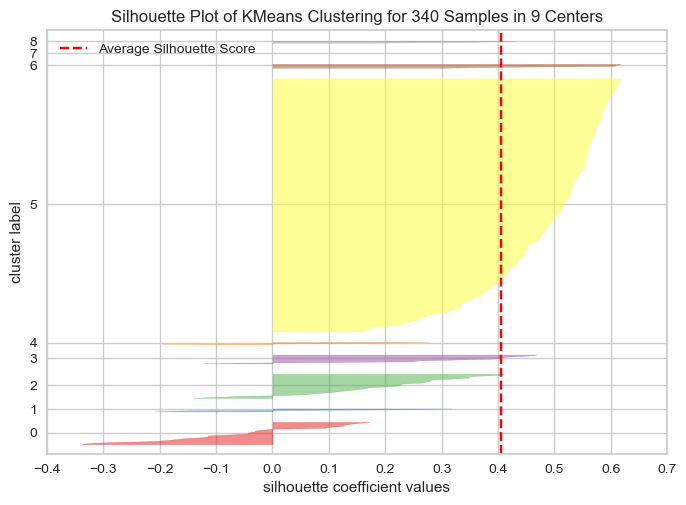

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

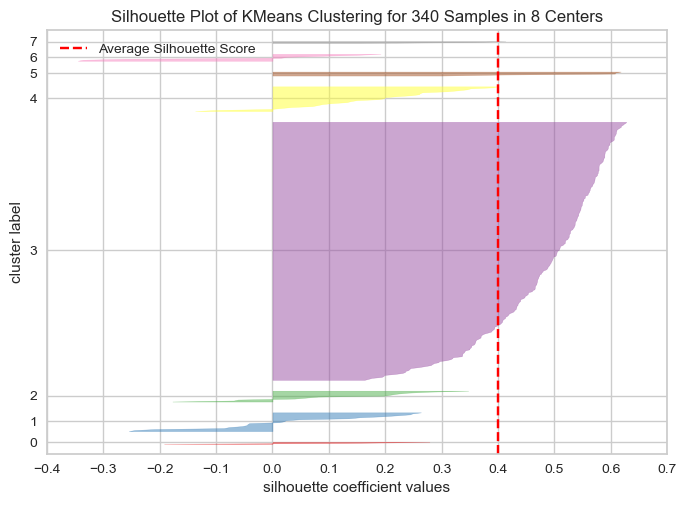

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

### Final Model

In [14]:
# final K-means model
kmeans = KMeans(n_clusters=8, random_state=1)  
kmeans.fit(k_means_df)

KMeans(random_state=1)

In [15]:
# Create a copy of the original data
df1 = df.copy()

# Adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [16]:
# Cluster Profiling
km_cluster_profile = df1.groupby("KM_segments").mean()

In [17]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  
)

In [18]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3
1,80.152167,14.571437,1.829679,28.100000,321.850000,625929050.000000,942050500.000000,2.010500,790456335.265000,45.067457,8.307945,20
2,47.710000,5.972014,1.154423,29.000000,77.833333,747416666.666667,14921000000.000000,4.156667,4011013535.683333,14.653677,-4.250943,12
3,71.306407,4.957486,1.372621,25.060837,50.904943,9314494.296578,1525372095.057034,3.686597,434120858.630608,23.271342,-3.359786,263
4,34.317647,-15.517006,2.828545,42.000000,46.884615,-165522730.769231,-1982407692.307692,-5.158846,506741126.001538,74.955649,1.651004,26
5,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
6,508.534992,5.732177,1.504640,27.250000,150.875000,37895875.000000,1116994125.000000,15.965000,75654420.935000,43.727459,29.581664,8
7,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


In [19]:
# Print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.' 'CF Industries H

In [20]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Energy                          3
1            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Health Care                     5
             Information Technology          8
             Materials                       1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         32
             Consumer Staples               15
             Energy                          5
             Financials                     44
             Health Care                    28
             Indust

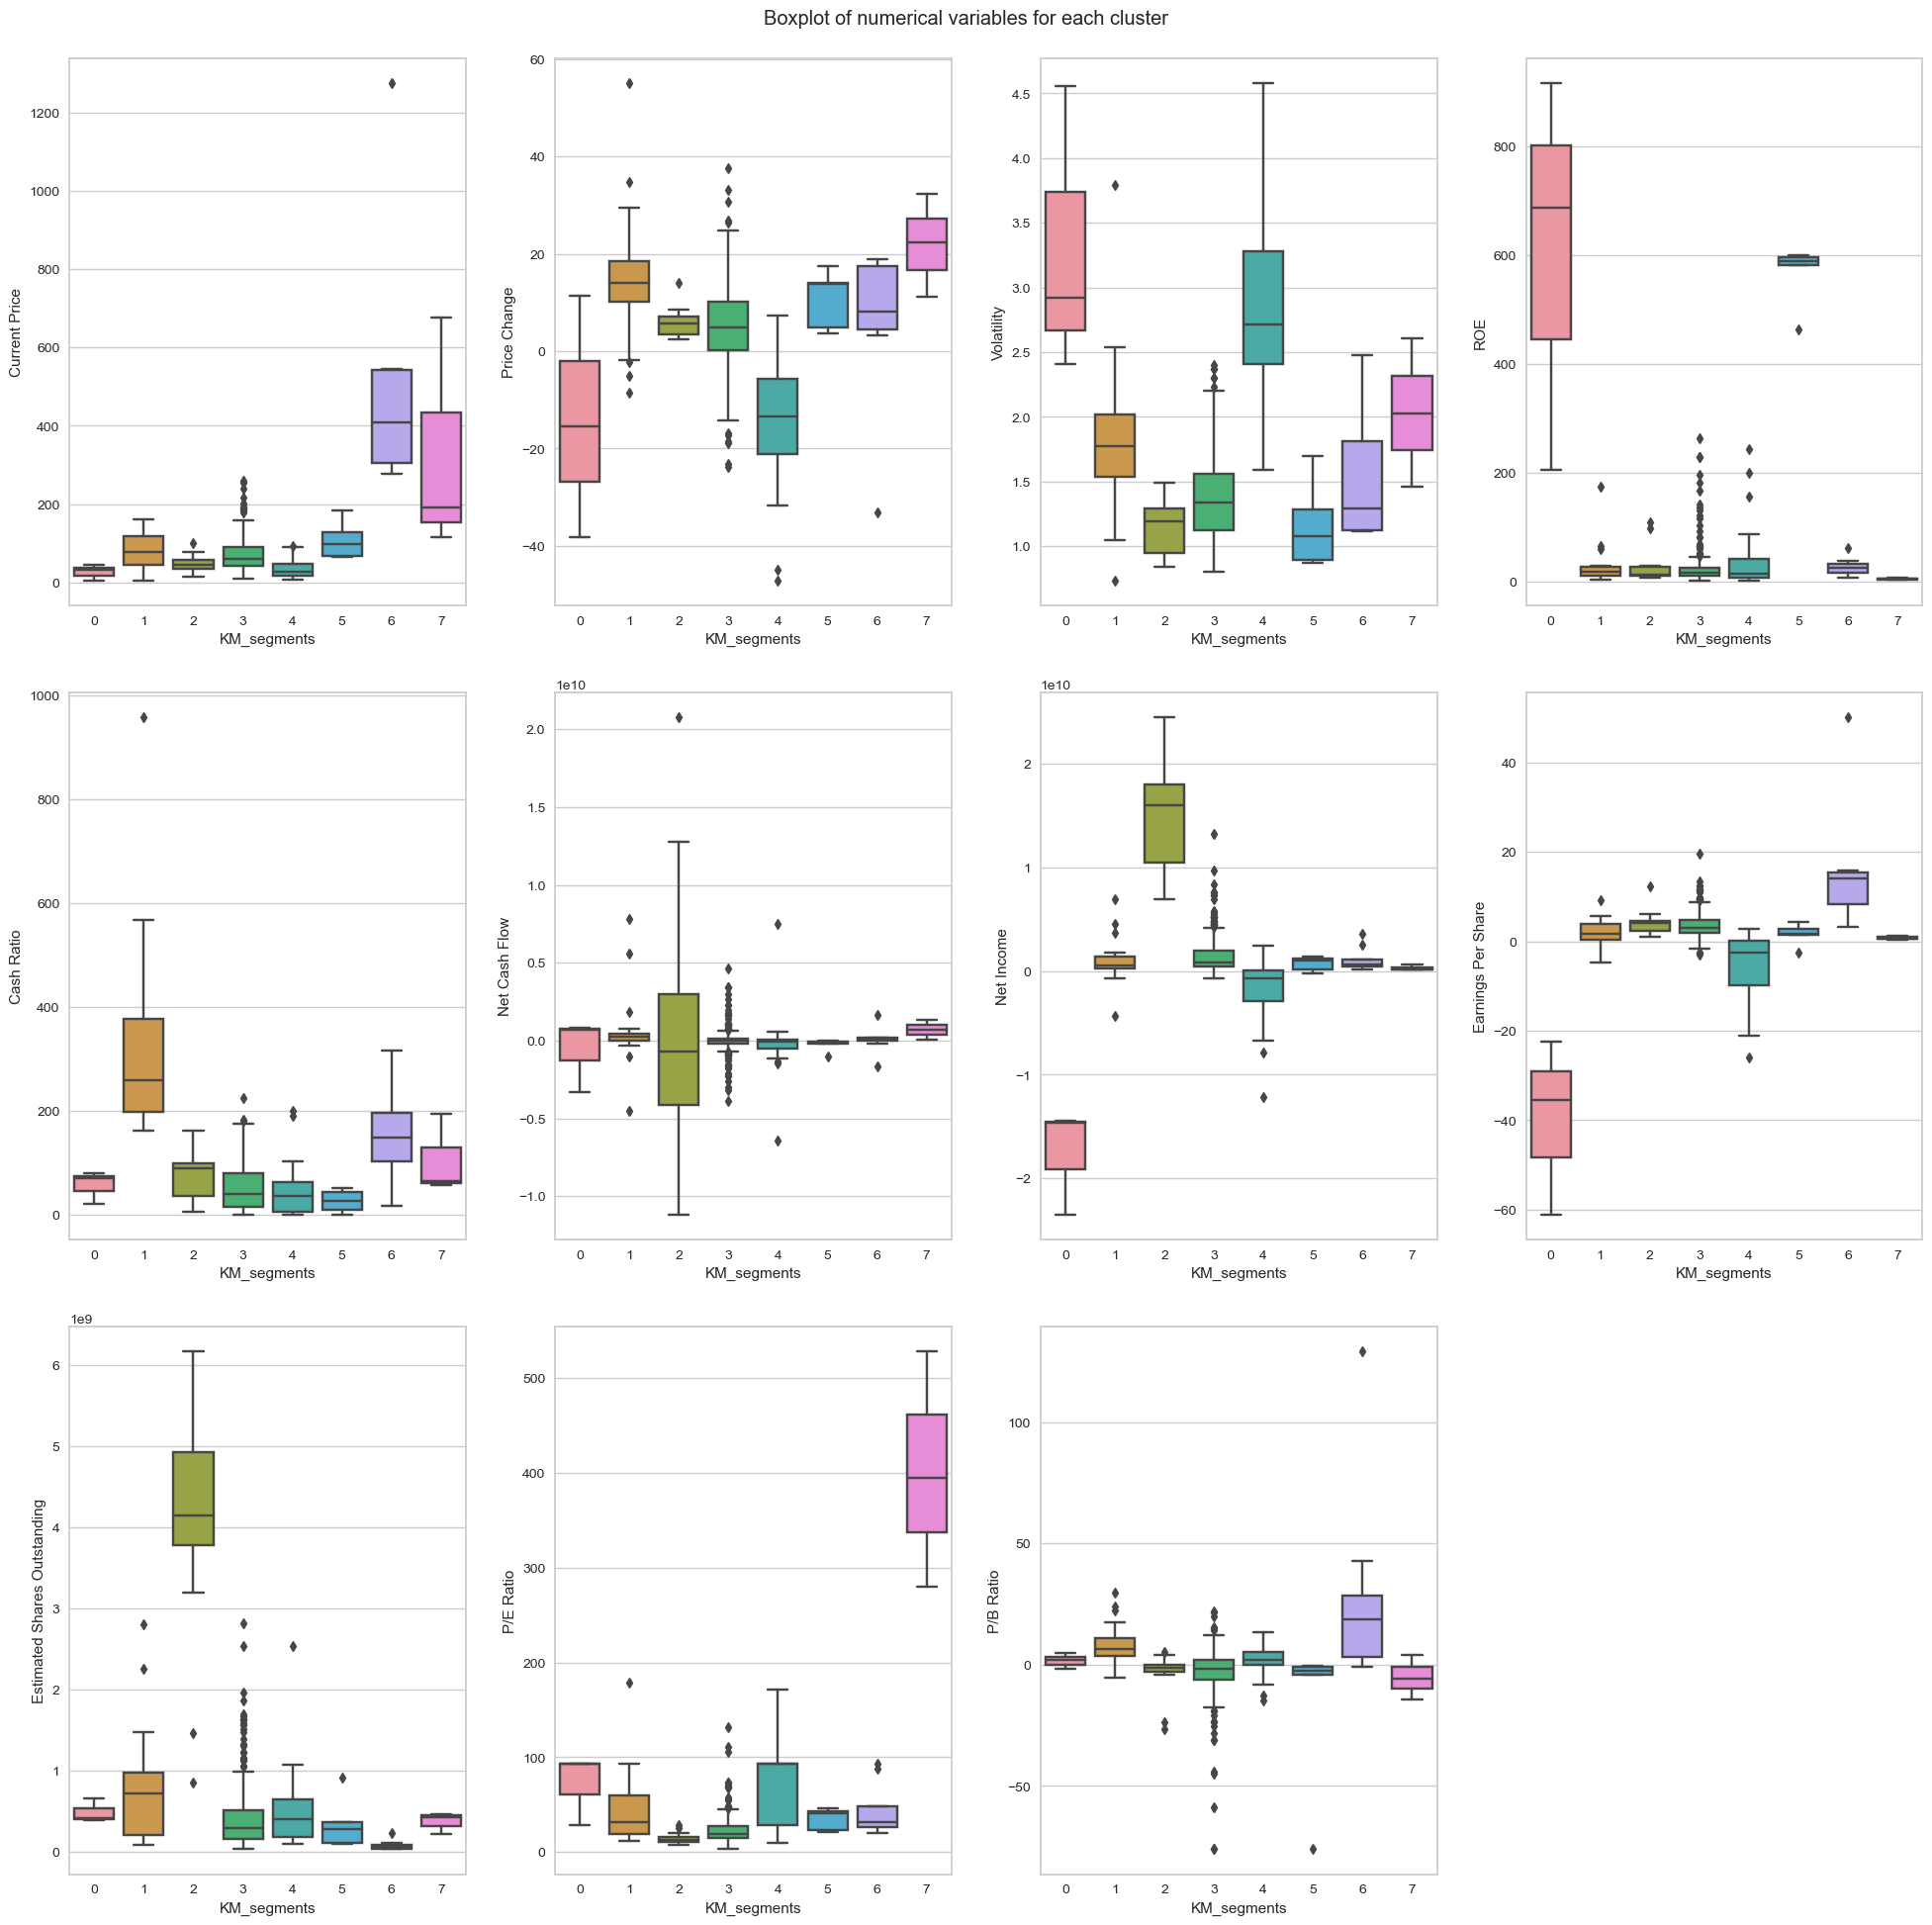

In [21]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

- Cluster 0 seems to contain struggling companies with negative returns and cash flows. This could represent distressed or value stocks.
- Clusters 1 and 2 appear focused on high growth, speculative companies based on volatility and valuation ratios. Likely contain more risky, momentum-driven stocks.
- Cluster 3 has moderate valuations but high volatility and cash levels. This may capture more stable, defensive stocks in volatile sectors.
- Cluster 4 has low volatility and valuations. This cluster could represent mature, dividend-paying stocks.
- Cluster 5 contains high ROE stocks, so likely contains financially efficient, profitable companies.
- Cluster 6 appears to be an outlier on cash levels, which could indicate cash-rich firms or holding companies.
- Cluster 7 seems more middle-of-the-road, with moderate risk and returns. May cover stable industries and large caps.

## Hierarchical Clustering

### Cophenetic Correlation

In [23]:
hc_df = subset_scaled_df.copy()

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] 

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524589.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159735.
Cophenetic correlatio

In [24]:
# Explore different linkage methods with Euclidean distance only
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] 

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### Dendrograms

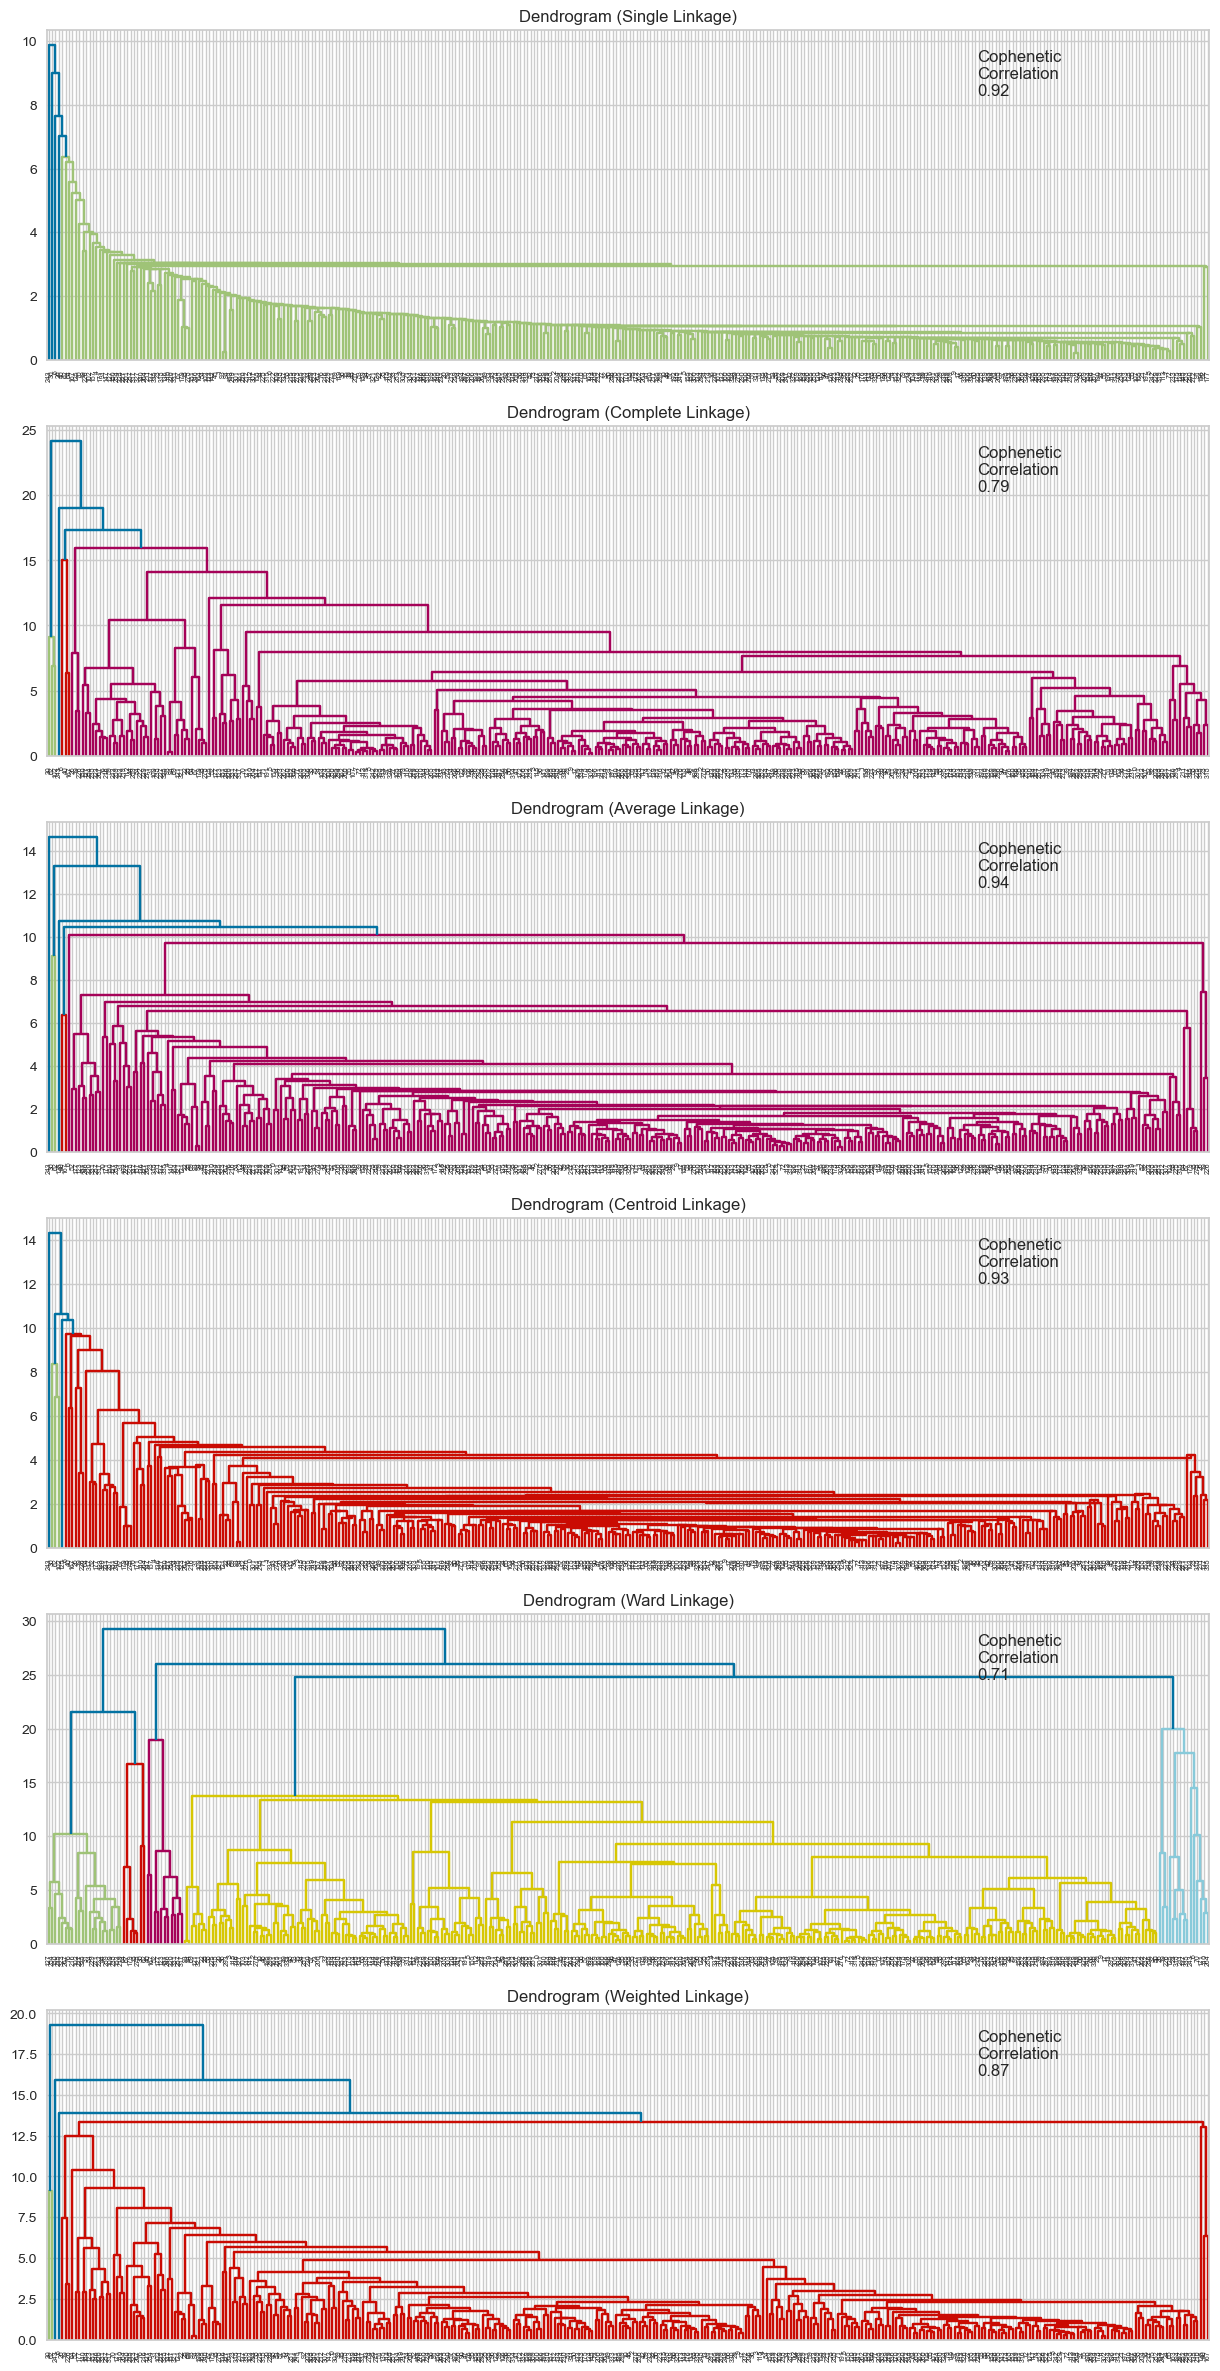

In [25]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] 

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# Enumerate through the list of linkage methods above
# For each linkage method, plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [26]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


### Model using sklearn

In [28]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')  
HCmodel.fit(hc_df)

# Create a copy of the original data
df2 = df.copy()

# Add hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [29]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  
)

hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330


In [30]:
## Print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

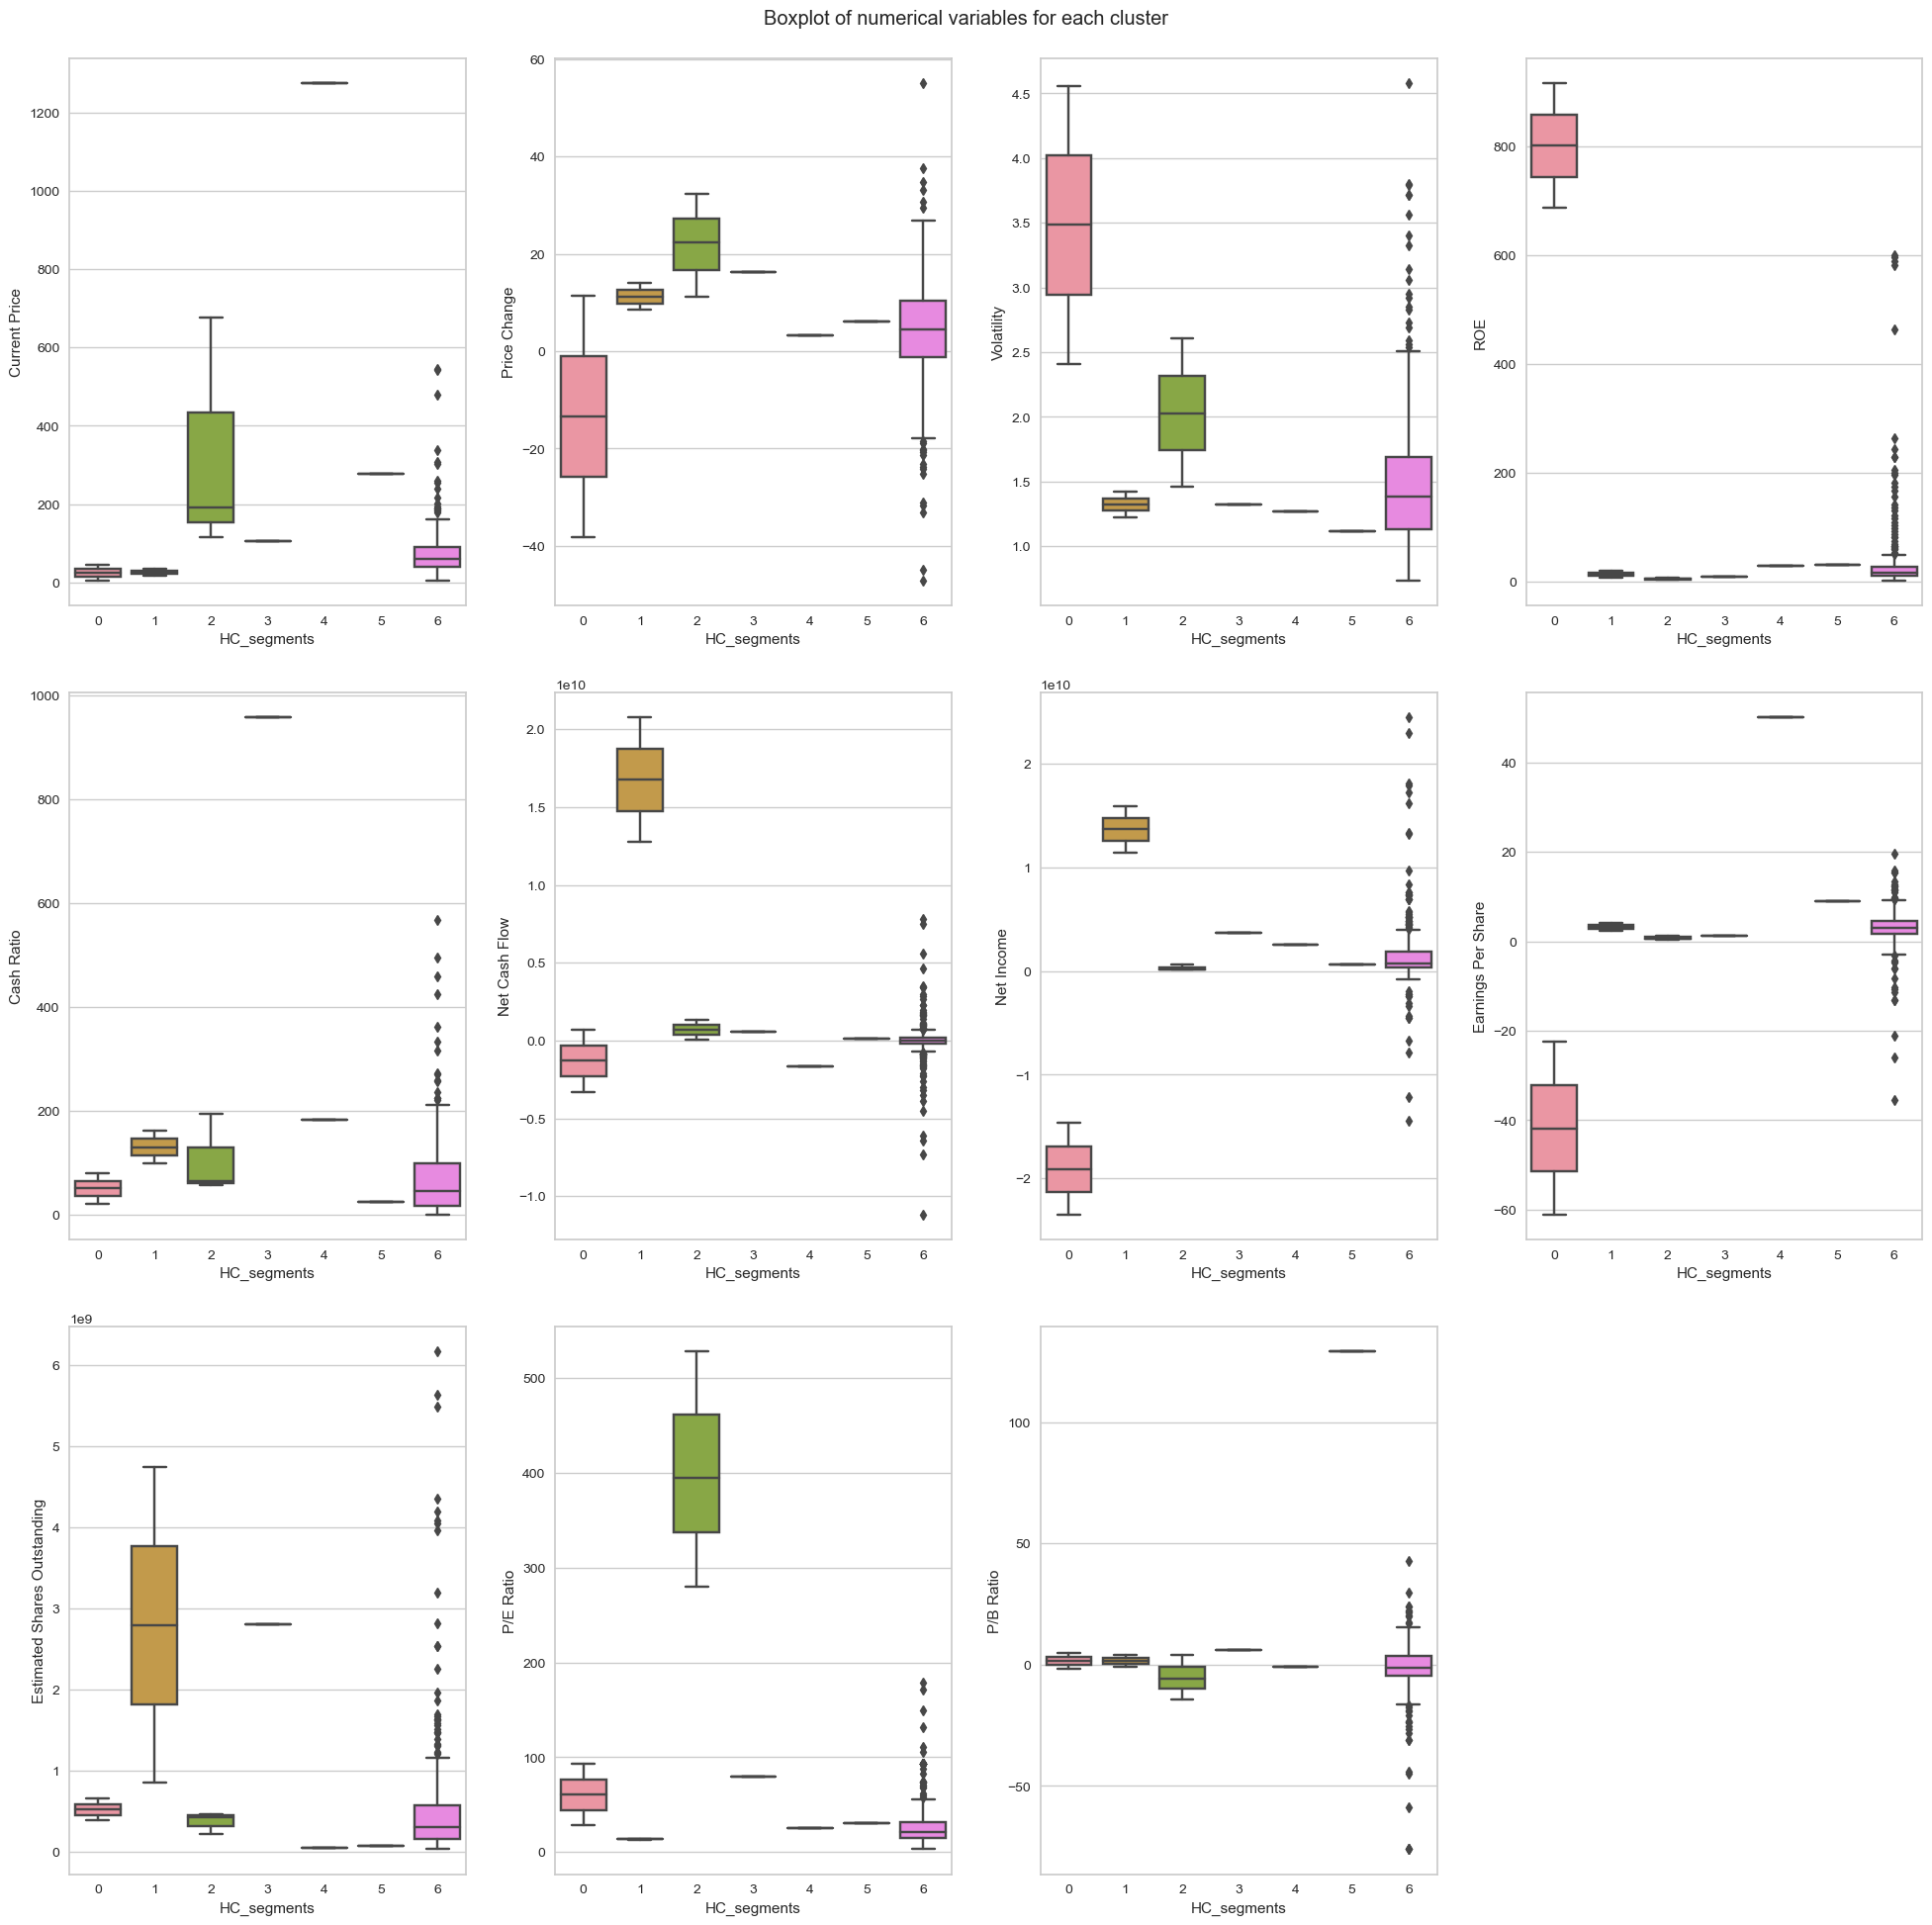

In [31]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

Execution Time:
- K-means took less time to execute than Hierarchical clustering. K-means is generally more efficient for large datasets. 

Number of Clusters:
- K-means and Hierarchical gave a similar number of distinct clusters, around 5-7 clusters. 

Observations in Similar Clusters:
- The major sector clusters like Technology, Healthcare, Financials etc had a similar number of stocks assigned in both K-means and Hierarchical clustering.

Optimal Number of Clusters:
- The optimal number of clusters was determined to be 6 using the Elbow method for K-means. For Hierarchical, the dendrogram plot also indicated 5-6 as a good number of clusters.

Cluster Profiles:
- Both algorithms generated similar cluster profiles - clusters of stocks belonging to the same sectors like Information Technology, Healthcare, Consumer Discretionary etc.

- The cluster profiles were not identical between the two techniques but had major overlap in sector composition. 

- K-means formed more compact and evenly sized clusters while Hierarchical had some larger and smaller clusters.

In summary, both K-means and Hierarchical clustering performed reasonably well in clustering the stocks into sector wise clusters. K-means was faster and formed more balanced clusters while Hierarchical gave a hierarchical relationship between the clusters. For this dataset, K-means may be slightly preferred over Hierarchical clustering.


## Actionable Insights and Recommendations

Key Insights:
- Stocks within the same sector demonstrate similarities and can be grouped together using clustering algorithms.

- Cluster analysis can reveal relationships between stocks and identify outliers.

Recommendations: 
- Clustering algorithms like K-means and Hierarchical clustering can be used by investment firms to analyze stock market data and make data-driven investment decisions.

- The optimal number of stock sectors can be determined using clustering techniques. Stocks belonging to the same cluster/sector tend to be affected similarly by market events.
